*Disclaimer*: This notebook was created as a part of **Data Analysis with pandas**, that I taught in Prague, September 2017.
My solutions are in notebook version 3, but try going through it by yourself at first :)

# Data analysis with example dataset - fun with Pokémon

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import Image
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline 
pd.options.mode.chained_assignment = None  # default='warn'

Pokémon is a media franchise managed by The Pokémon Company, a Japanese consortium between Nintendo, Game Freak, and Creatures. It now spans video games, trading card games, animated television shows and movies, comic books, and toys.

In [3]:
Image('http://cdn-static.denofgeek.com/sites/denofgeek/files/pokemon_4.jpg')

<IPython.core.display.Image object>

### 1. Read data into memory

Given we have data ready on the disk, we can read it into pandas DataFrame, that is stored in python memory. But are we in the same directory? Let's check to be sure...

In [4]:
# prints current working directory full path
os.getcwd()

'/kaggle/working'

In [5]:
# reads csv file into 
poke = pd.read_csv('../input/Pokemon.csv')

In [6]:
# shows first  few rows of table
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**Q: What is a DataFrame in pandas?**

It's a collection of Series (columns) with the same lenght that are made of numpy arrays.

In [7]:
# data frame
type(poke)

pandas.core.frame.DataFrame

In [8]:
# series
type(poke['Name'])

pandas.core.series.Series

In [9]:
# numpy array
type(poke['Name'].values)

numpy.ndarray

In [10]:
# basic python/numpy data type - str, int, float...
type(poke['Name'].values[0])

str

In [11]:
poke['Name'].head()

0                Bulbasaur
1                  Ivysaur
2                 Venusaur
3    VenusaurMega Venusaur
4               Charmander
Name: Name, dtype: object

In [12]:
len(poke)

800

In [13]:
len(poke) == len(poke['Name'])

True

### 2. Explore dataset

What's in the dataset and how does it look like? In data exploration, we try to answer these questions.

In [14]:
# general information about columns
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [15]:
# summary statistics of numeric columns
poke.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [16]:
# How many null values are there?
poke.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [17]:
# How many legendary and common pokemon are there?
poke['Legendary'].sum()

65

Q: Can you tell me how is the number calculated and if it is correct?

#### Slicing and filtering - Is there pikachu and what kind of pokemon is he? 

In [18]:
# boolean filtering
poke[poke['Name'] == 'Pikachu']

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False


In [19]:
# subsetting with .loc and .iloc
poke[poke.loc[:,'Name'].isin(['Pikachu', 'Bulbasaur', 'Charmander', 'Squirtle'])]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False


In [20]:
# creating subset data frame
image_poke = poke[poke.loc[:,'Name'].isin(['Pikachu', 'Bulbasaur', 'Charmander', 'Squirtle'])]
image_poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False


Let's make some simple plot.

In [21]:
# how to make plot with pandas and what arguments to pass?
image_poke.plot??
# two question marsk show full docstring that is present at documentation webpage for pandas.

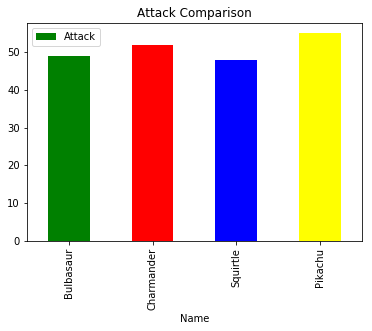

In [22]:
# this draws it in a cell
# barplot that compares attack of chosen pokemon 
image_poke.plot.bar(x='Name', y='Attack', color=['green', 'red', 'blue', 'yellow'], title='Attack Comparison')

### 3. Clean data

Can we work with the dataset as it is or do we need to do some adjustments? Filling/removing null values, creating new columns with calculated values, deleting redundant columns, removing incomplete rows, creating relevant subsets of dataset, converting datatypes, renaming column names... These are all part of data cleaning step that is required before we can further analyze the data.

Renaming columns

In [23]:
poke = poke.rename(columns={'#':'Number'})
poke.columns

Index(['Number', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

Subset of pokemon that are only common.

In [24]:
# Only common means non-legendary :)
only_common = # fill in poke[poke['']]
only_common

SyntaxError: invalid syntax (<ipython-input-24-866983d15e54>, line 2)

Subset of pokemon that don't contain 'Mega' in their name.

In [25]:
# Finish subset of DataFrame using condition so that only pokemon that don't have Mega in their name are selected (hint: ~)
no_mega = # finish the subset ['Name'].str.contains('Mega ')
no_mega.head()

SyntaxError: invalid syntax (<ipython-input-25-3335e3161681>, line 2)

**Group by** operation to aggregate data.

In [26]:
# check if there is only 1 pokemon for every number
poke['Number'].groupby(poke['Number']).count().sort_values(ascending=False)
# we don't want to show so long output afterwards, so we can just add ';' behind the command not to show the output afterwards.

Number
479    6
386    4
711    4
710    4
150    3
6      3
413    3
646    3
303    2
302    2
648    2
65     2
555    2
487    2
308    2
254    2
306    2
310    2
492    2
214    2
384    2
383    2
382    2
647    2
641    2
645    2
94     2
115    2
445    2
257    2
      ..
455    1
454    1
453    1
452    1
451    1
450    1
449    1
447    1
467    1
468    1
469    1
470    1
490    1
489    1
488    1
486    1
485    1
484    1
483    1
482    1
481    1
480    1
478    1
477    1
476    1
474    1
473    1
472    1
471    1
1      1
Name: Number, Length: 721, dtype: int64

Removing mega wasn't enough. Let's consider all pokemon with same number as duplicates, drop them and keep only the first one.

In [27]:
# Finish the subset
nodup_poke =  # .drop_duplicates('Number', keep='first', inplace=False)
nodup_poke.head()

SyntaxError: invalid syntax (<ipython-input-27-16dac8abb1ea>, line 2)

In [28]:
# Reindex the dataframe, so the first index is 0 and the last is n-1
nodup_poke.reset_index(inplace=True, drop=True)
nodup_poke.head()

NameError: name 'nodup_poke' is not defined

Now that we have desired and clean dataset, let's move to another step.

### 4. Clean Data Processing

In this step, we are ready to answer our questions with our dataset. In case we don't have any specific questions, we are doing just exploratory data analysis - looking what is inside the data.

So here are some questions:
- Which pokemon type is the most frequent?
- Which pokemon type is the strongest and which the weakest? (according to total stats)
- What are the 5 strongest pokemon among the common pokemon?
- Which pokemon generation has the biggest average total stats?
- How strong is Pikachu among pokemon of the same type?

In [29]:
# How many unique pokemon are there in the remaining dataset?
len(nodup_poke['Number'].unique())

NameError: name 'nodup_poke' is not defined

In [30]:
# Which pokemon type is the strongest and which the weakest on average? (according to total stats)
strongest_type_avg = nodup_poke[['Type 1','Total']].groupby(nodup_poke['Type 1']).mean().sort_values(by='Total', ascending=False)
strongest_type_avg

NameError: name 'nodup_poke' is not defined

What happened in the previous line of code? Let's look:
1. Choose a data frame subset based on what values you want to see in result -  **nodup_poke[['Type 1','Total']]**
2. Choose a column you want the table to be grouped by. To group values means put all rows with the same value of selected column into one row. - **groupby(nodup_poke['Type 1'])**
3. Now that we have many values in the same row, we need to transform them into one value with aggregation function. Typical examples are *count, average, sum, max* - **mean()**
4. The last step is sorting the result based on values in descending order - **sort_values(by='Total', ascending=False)**

Try the same logic in the upcoming examples:

In [31]:
# Find the strongest pokemon in each group based on Type 1 and order them alphabetically from A-Z.
# Notice, this one has different logic - we do sorting first and only then group by and take the first observation for every group.
strongest_type_max = nodup_poke[['Total', 'Name', 'Type 1']].sort_values(
                                by='Total', ascending=False).groupby('Type 1', as_index=False).first()
strongest_type_max 

NameError: name 'nodup_poke' is not defined

In [32]:
# Which pokemon type is the most frequent?
type_frequency = nodup_poke['Type 1'].# fill in the rest, sort from largest to smallest
type_frequency

SyntaxError: invalid syntax (<ipython-input-32-6ee715a92b32>, line 2)

In [33]:
# What are the 5 strongest pokemon among the common pokemon?
top5_poke = nodup_poke[['Name', 'Total']].sort_values(by='Total', ascending=False)[0:5]
top5_poke

NameError: name 'nodup_poke' is not defined

In [34]:
# Which pokemon generation has the biggest average total stats?
generation_comparison = # generation and total columns. groupby column. aggregation function. sort function by value
generation_comparison

SyntaxError: invalid syntax (<ipython-input-34-9ab8a8ed5c42>, line 2)

In [35]:
# What type is pikachu?
pikachu_type = nodup_poke['Type 1'][nodup_poke['Name'] == 'Pikachu'].values[0]
pikachu_type

NameError: name 'nodup_poke' is not defined

In [36]:
# How strong is Pikachu among pokemon of the same type? Hint: debugging
pikachu_rank = nodup_poke[nodup_poke['Type 1'] == pikachu_type].sort_values();
pikachu_rank;

NameError: name 'nodup_poke' is not defined

In [37]:
# reset index of table to start from 0 to n-1
pikachu_rank.reset_index(inplace=True)
pikachu_rank

NameError: name 'pikachu_rank' is not defined

### 5. Results visualization

- Create a histogram of all common pokemon's total stats
- Create a boxplot of total stats by type
- Create a boxplot of total stats by generation
- Create a barplot of total stats by generation
- Show Pikachu's total stats among other pokemon of the same type together with generation of pokemon

In [38]:
# Create a histogram of all common pokemon's total stats
# fill in missing .plot.hist(bins=15)

In [39]:
import matplotlib.cm as cm  # these would normally be at the beginning of the notebook

# colormaps https://matplotlib.org/examples/color/colormaps_reference.html
type_colors = cm.spring(np.linspace(0.05,0.95,len(type_frequency)))
type_frequency.plot.bar(color=type_colors)

NameError: name 'type_frequency' is not defined

In [40]:
# Create a boxplot of average total stats by type. Hint: use tables we created in previous step
nodup_poke[nodup_poke['Type 1'].isin(['Bug', 'Water', 'Grass', 'Poison'])
          ].boxplot(column='Total', by='Type 1')

NameError: name 'nodup_poke' is not defined

In [41]:
# Create a boxplot of total stats by generation
# fill in missing .boxplot(column='Total', by='Generation')

In [42]:
# Create a barplot of total stats by generation
generation_comparison['Generation'] = generation_comparison['Generation'].astype('str')
gen_colors = cm.summer(np.linspace(0.05,0.95,len(generation_comparison)))
generation_comparison.plot.bar(x='Generation',color=gen_colors, title='Comparison of avg total stats between pokemon generations')

NameError: name 'generation_comparison' is not defined

In [43]:
# Create a barplot of strongest pokemon in each Type 1. One color for all is fine.
# fill in all :) 

In [44]:
# Show Pikachu's total stats among other pokemon of the same type together with generation of pokemon
pikachu_rank['color'] = 'Grey'
pikachu_rank['size'] = 30
pikachu_rank['color'][pikachu_rank['Name']=='Pikachu']='Yellow'
pikachu_rank['size'][pikachu_rank['Name']=='Pikachu']=100
pika_plot = pikachu_rank.plot.scatter(x='Generation', y='Total', 
                                      c=pikachu_rank['color'], s=pikachu_rank['size'],
                          title='Pikachu vs other electric pokemon')

NameError: name 'pikachu_rank' is not defined

Save the plot as png file

In [45]:
fig = pika_plot.get_figure()
fig.savefig('pika_plot.png')

NameError: name 'pika_plot' is not defined

## Summary
This notebook introduces basic operations that are done in the process of Data Analysis.
If you liked the format, look also at my Kickstarter kernel, which has more advanced stuff and more exercises in it :)